In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coco-car-damage-detection-dataset/val/8.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/42.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/62.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/COCO_mul_val_annos.json
/kaggle/input/coco-car-damage-detection-dataset/val/COCO_val_annos.json
/kaggle/input/coco-car-damage-detection-dataset/val/9.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/1.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/22.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/24.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/74.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/32.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/3.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/78.jpg
/kaggle/input/coco-car-damage-detection-dataset/test/45.jpg
/kaggle/input/coco-car-damage-detection-dataset/test/67.jpg
/kaggle/input/coco-car-damage-detection-dataset/test/60.jpg
/kaggle/input/coco-car-dama

In [3]:
pip install --upgrade imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=6709fe73cdba0b31f976ce4ee0bb3d02d57603cbee919d4cfa38bf6ddac1c14d
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [5]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-5
EPOCHS = 50
BS = 64

DIRECTORY = r"../input/car-damage-detection/data1a/training/"
DIRECTORY2=r"../input/car-damage-detection/data1a/validation/"
CATEGORIES = ["00-damage", "01-whole"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []
labels = []
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
      img_path = os.path.join(path, img)
      image = load_img(img_path, target_size=(224, 224))
      image = img_to_array(image)
      image = preprocess_input(image)

      data.append(image)
      labels.append(category)
for category in CATEGORIES:
    path = os.path.join(DIRECTORY2, category)
    for img in os.listdir(path):
      img_path = os.path.join(path, img)
      image = load_img(img_path, target_size=(224, 224))
      image = img_to_array(image)
      image = preprocess_input(image)

      data.append(image)
      labels.append(category)

[INFO] loading images...


In [6]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.30, stratify=labels, random_state=42)
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

In [7]:
baseModel =MobileNetV2 (weights="imagenet", include_top=False, input_tensor=Input (shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
#the base model
headModel= baseModel.output 
headModel= MaxPooling2D(pool_size=(7, 7))(headModel)
headModel =Flatten(name="flatten")(headModel)
headModel =Dense(128, activation="relu")(headModel) 
headModel= Dropout(0.5)(headModel) 
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become # the actual model we will train) 
model=Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will # *not* be updated during the first training process 

9406464/9406464 [==============================] - 1s 0us/step


In [8]:
for layer in baseModel.layers:
    layer.trainable=False
print("[INFO] compiling model...")
opt= Adam(lr=INIT_LR) 
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")

[INFO] compiling model...
[INFO] training head...


In [9]:
history= model.fit(aug.flow(trainX, trainY, batch_size=BS),steps_per_epoch=len(trainX) // BS, validation_data=(testX, testY),validation_steps=len(testX) // BS,epochs=5)

Epoch 1/5
25/25 [==============================] - 30s 792ms/step - loss: 0.9512 - accuracy: 0.7251 - val_loss: 0.3890 - val_accuracy: 0.8275
Epoch 2/5
25/25 [==============================] - 18s 705ms/step - loss: 0.4625 - accuracy: 0.7872 - val_loss: 0.3206 - val_accuracy: 0.8681
Epoch 3/5
25/25 [==============================] - 18s 719ms/step - loss: 0.3998 - accuracy: 0.8254 - val_loss: 0.3380 - val_accuracy: 0.8478
Epoch 4/5
25/25 [==============================] - 19s 728ms/step - loss: 0.3545 - accuracy: 0.8512 - val_loss: 0.3322 - val_accuracy: 0.8580
Epoch 5/5
25/25 [==============================] - 17s 691ms/step - loss: 0.3579 - accuracy: 0.8583 - val_loss: 0.3388 - val_accuracy: 0.8536


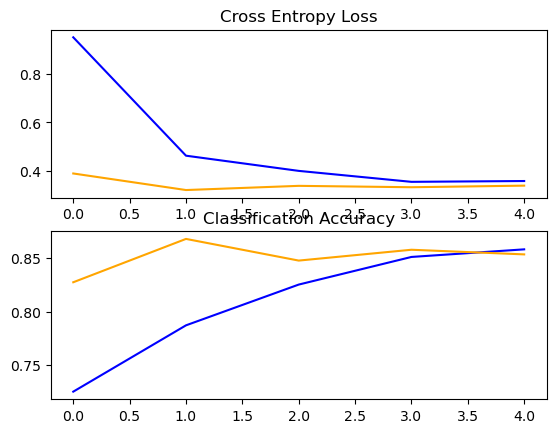

In [10]:
from matplotlib import pyplot as plt
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()